In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
from scipy.stats import sem
from collections import Counter as _Counter

import sys
sys.path.append('..')
sys.path.append('../lib')
from lib import *
plt.style.use('../peptidome.mplstyle')
from lib.plotting import model_labels as labels

import matplotlib.ticker as ticker

import json
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

## For original analyses and data derivation see https://github.com/andim/peptidome/tree/master/code/mivsdist

In [2]:
datadir ='../data/Figure Data/mutual_information'

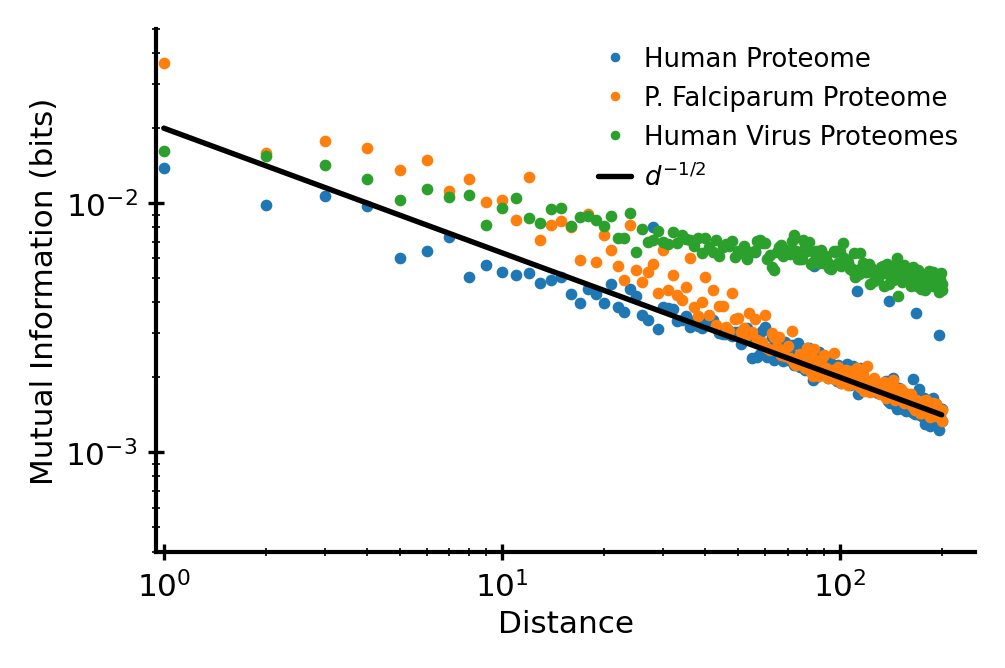

In [3]:
fig, ax = plt.subplots()

label_map = {
    'Human': 'Human Proteome',
    'Malaria': 'P. Falciparum Proteome',
    'Viruses': 'Human Virus Proteomes'
}
for species in ['Human', 'Malaria','Viruses']:
    df = pd.read_csv(f'{datadir}/mutualinformation-%s.csv'%species)
#     err = ax.errorbar(df['gaps']+1, df['mutualinformation'],
#             2*df['mutualinformation_std'], fmt='_', label=species, ms=3)
    ax.plot(df['gaps']+1, df['mutualinformation'], 'o',label=label_map[species],ms=2)

#    ax.plot(df['gaps']+1, df['shuffledmutualinformation'], '_', ms=3,
#            label=('shuffled') if species == 'Human' else '', c=err.lines[0].get_color())
d = np.linspace(1, 200)
#ax.plot(d, 0.005*np.exp(-d/50), zorder=10, label='exponential ($d_c=50$)')
l, = ax.plot(d, 0.02*d**-.5, zorder=10, c='k', label=r'$d^{-1/2}$')
ax.legend(loc='upper right', ncol=1)
ax.set_ylim(0.0004, 0.05)
ax.set_xlim(0.95, 251.0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Distance')
ax.set_ylabel('Mutual Information (bits)')
fig.tight_layout()
# plt.savefig('../mutual_information.png')
# plt.savefig('../mutual_information.svg')

In [4]:
df['mutualinformation'].max()

np.float64(0.0162607047858465)

In [5]:
def get_counter(kmers):
    sb = ""
    for k in kmers:
        for i in range(kmers[k]):
            sb += k
    c =  _Counter(sb)
    denominator = len(sb)

    return [c[letter]/denominator for letter in aminoacids]


In [6]:
freqs = {}


fasta_dir = '../data'
for fasta in [
        'human-viruses-uniref90-filtered.fasta',
        'UP000000589Mouse.fasta.gz',
        'UP000001450Malaria.fasta.gz',
        'UP000000437Zebrafish.fasta.gz',
        'UP000000750StrepA.fasta',
        'UP000001584Tuberculosis.fasta',
        'UP000000539Chicken.fasta.gz',
        'UP000000817Listeria.fasta',
        'UP000005640Human.fasta.gz'
    ]:
    print(fasta)
    kmers = count_kmers_proteome(os.path.join(fasta_dir, fasta),9)
    freqs[fasta]  = get_counter(kmers)
    print('-----------------------------------')

human-viruses-uniref90-filtered.fasta
-----------------------------------
UP000000589Mouse.fasta.gz
-----------------------------------
UP000001450Malaria.fasta.gz
-----------------------------------
UP000000437Zebrafish.fasta.gz
-----------------------------------
UP000000750StrepA.fasta
-----------------------------------
UP000001584Tuberculosis.fasta
-----------------------------------
UP000000539Chicken.fasta.gz
-----------------------------------
UP000000817Listeria.fasta
-----------------------------------
UP000005640Human.fasta.gz
-----------------------------------


In [7]:
aminoacids

'ACDEFGHIKLMNPQRSTVWY'

In [8]:
load_proteomes()

,fullname,iedbname,speciesid,proteomeid,type,comment,path
shortname,,,,,,,
Human,Homo sapiens,Homo sapiens,9606,UP000005640,vertebrate,,UP000005640Human.fasta.gz
Mouse,Mus Musculus,Mus Musculus,10090,UP000000589,vertebrate,,UP000000589Mouse.fasta.gz
Chicken,Gallus gallus,Gallus gallus,9031,UP000000539,vertebrate,,UP000000539Chicken.fasta.gz
Zebrafish,Danio rerio,Danrio rerio,7955,UP000000437,vertebrate,,UP000000437Zebrafish.fasta.gz
Yeast,Saccharomyces cerevisiae,,,UP000002311,fungus,,UP000002311Yeast.fasta
Cockroach,Blattella germanica,Blattella germanica,6973,UP000245037,invertebrate,,UP000245037Cockroach.fasta.gz
Wheat,Triticum aestivum,Triticum aestivum,4565,UP000019116,plant,,UP000019116Wheat.fasta.gz
Soybean,Glycine max,Glycine max,3847,UP000008827,plant,,UP000008827Soybean.fasta.gz
Vaccinia,Vaccinia virus,Vaccinia virus,,UP000000344,virus,,UP000000344Vaccinia.fasta


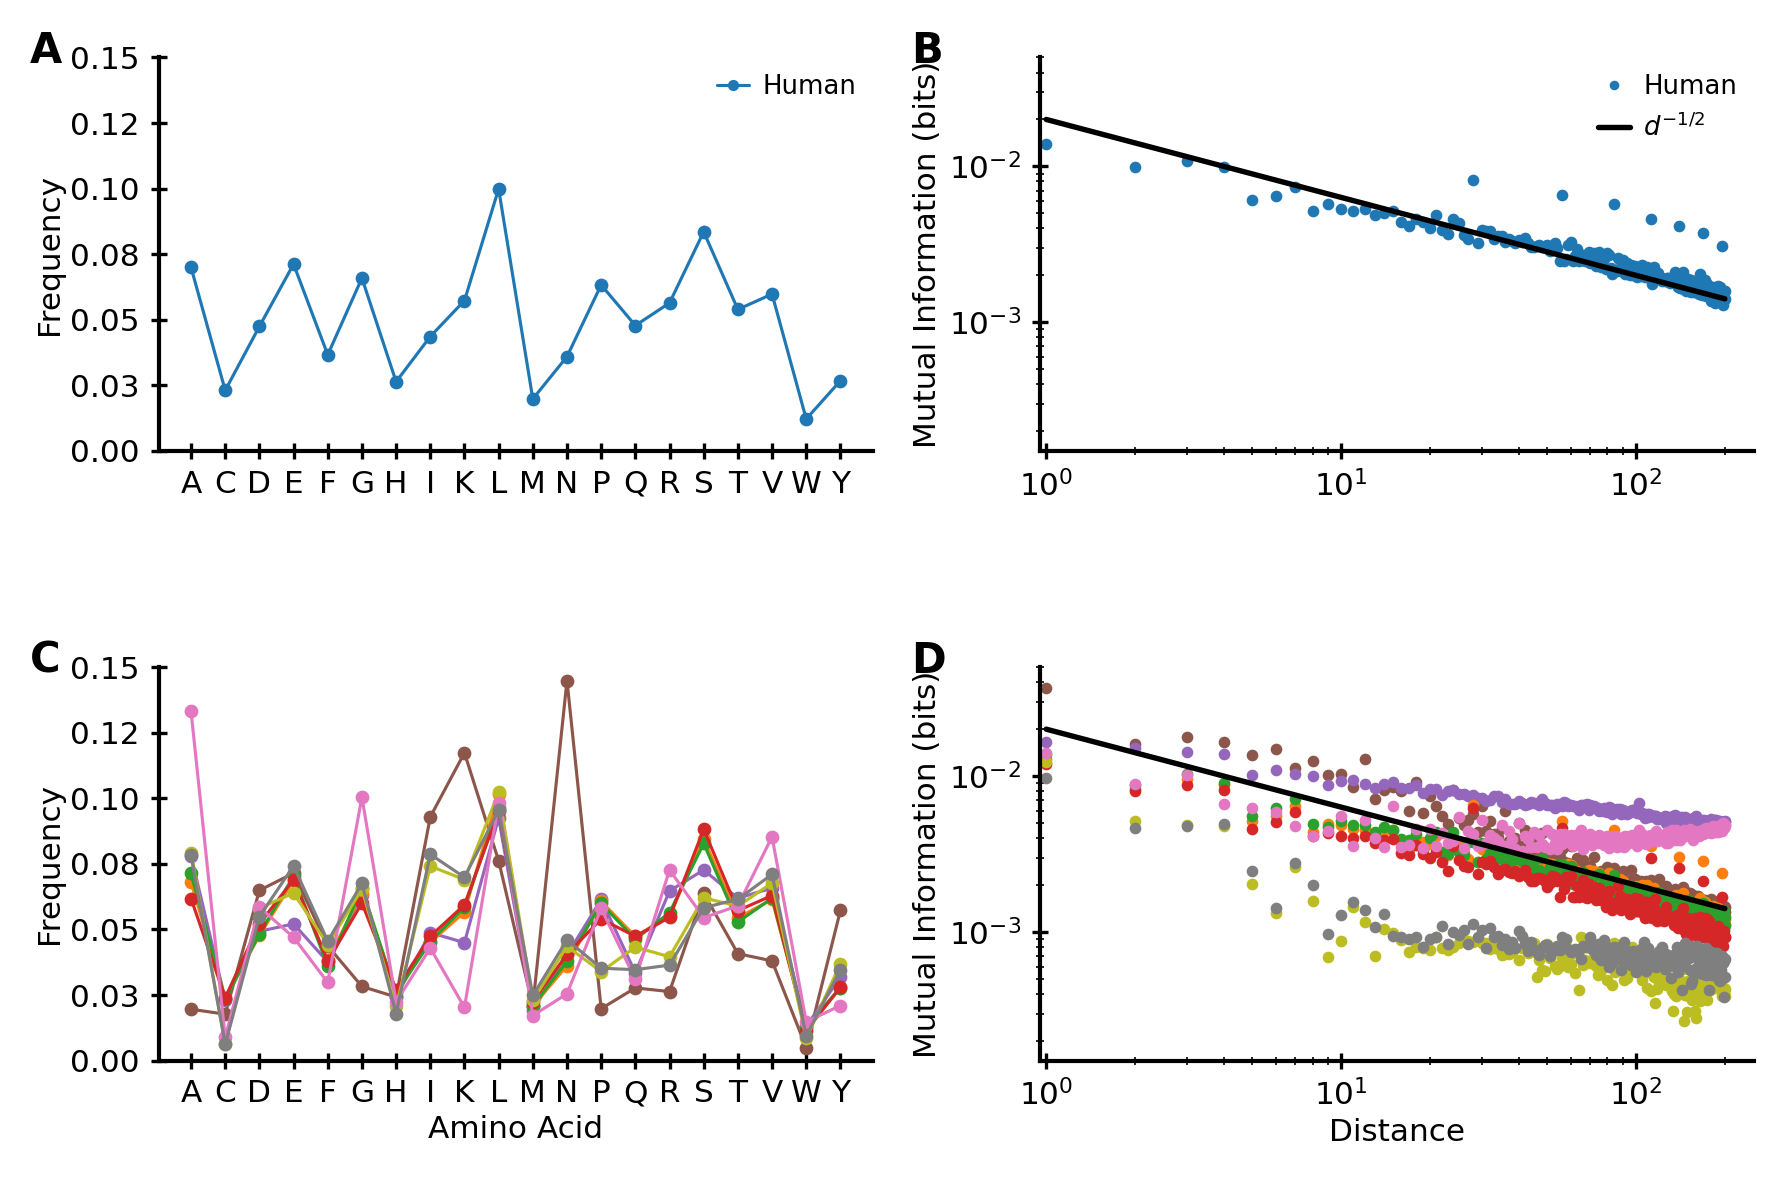

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(6,4))

color_map = {
    'P. Falciparum':'#8c564b',
    'Mouse': '#ff7f0e',
    'Chicken': '#2ca02c',
    'Zebrafish': '#d62728',
    'Human Virus Ensemble': '#9467bd',
    'Tuberculosis': '#e377c2',
    'Listeria': '#7f7f7f',
    'StrepA': '#bcbd22',
    'Human': '#1f77b4'
}

label_map = {
    'UP000005640Human.fasta.gz': 'Human',
    'UP000001450Malaria.fasta.gz': 'P. Falciparum',
    'human-viruses-uniref90-filtered.fasta': 'Human Virus Ensemble',
    'UP000000589Mouse.fasta.gz': 'Mouse',
    'UP000000539Chicken.fasta.gz': 'Chicken',
    'UP000000437Zebrafish.fasta.gz': 'Zebrafish',
    'UP000000750StrepA.fasta': 'StrepA',
    'UP000001584Tuberculosis.fasta': 'Tuberculosis',
    'UP000000817Listeria.fasta': 'Listeria'
}

   
      


for fasta, label in label_map.items():
    if label == 'Human':
        continue
    ax[1,0].plot(list(range(len(aminoacids))), freqs[fasta],'-o',label=label, linewidth=.75,color=color_map[label])

ax[0,0].plot(list(range(len(aminoacids))), freqs['UP000005640Human.fasta.gz'],'-o',label='Human', linewidth=.75,color=color_map['Human'])
ax[0,0].set_xticks(list(range(len(aminoacids))))
ax[1,0].set_xticks(list(range(len(aminoacids))))
ax[1,0].set_xticklabels(aminoacids)
ax[0,0].set_xticklabels(aminoacids)
ax[1,0].set_xlabel('Amino Acid')
ax[0,0].set_ylabel('Frequency')
ax[1,0].set_ylabel('Frequency')
ax[0,0].set_ylim([0,.15])
ax[0,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax[1,0].set_ylim([0,.15])
ax[1,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax[0,0].legend()

    
    
    
label_map = {
    'bsub_mutualinformation-Human.csv': 'Human',
    'bsub_mutualinformation-Malaria.csv': 'P. Falciparum',
    'bsub_mutualinformation-Viruses.csv': 'Human Virus Ensemble',
    'bsub_mutualinformation-Mouse.csv': 'Mouse',
    'bsub_mutualinformation-Chicken.csv': 'Chicken',
    'bsub_mutualinformation-Zebrafish.csv': 'Zebrafish',
    'bsub_mutualinformation-StrepA.csv': 'StrepA', 
    'bsub_mutualinformation-Tuberculosis.csv': 'Tuberculosis',
    'bsub_mutualinformation-Listeria.csv': 'Listeria'
    
}
     
for path, label in label_map.items():
    df = pd.read_csv(f'{datadir}/{path}')
    if label == 'Human':
        _ax = ax[0,1]
    else:
        _ax = ax[1,1]
    _ax.plot(df['gaps']+1, df['mutualinformation'], 'o',label=label,color=color_map[label],ms=2)


d = np.linspace(1, 200)
#ax.plot(d, 0.005*np.exp(-d/50), zorder=10, label='exponential ($d_c=50$)')
for _ax in [ax[0,1], ax[1,1]]:
    l, = _ax.plot(d, 0.02*d**-.5, zorder=10, c='k', label=r'$d^{-1/2}$')
    _ax.set_ylim(0.00015, 0.05)
    _ax.set_xlim(0.95, 251.0)
    _ax.set_xscale('log')
    _ax.set_yscale('log')
    _ax.set_ylabel('Mutual Information (bits)')

ax[0,1].legend()
ax[1,1].set_xlabel('Distance')

label_axes(fig, labelstyle='%s', xy=(-0.18, 1.07),fontsize=10)

fig.tight_layout()
fig.subplots_adjust(hspace=.55)
# plt.savefig('../s1.png')
# plt.savefig('../s1.svg')

In [10]:
# genomic null model
from collections import Counter
import itertools
import matplotlib.pyplot as plt
from Bio.Data import CodonTable
from matplotlib.gridspec import GridSpec


In [11]:
standard_table = CodonTable.unambiguous_dna_by_id[1]
print("Standard Genetic Code (DNA):")
print(standard_table)

Standard Genetic Code (DNA):
Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E

In [12]:
standard_table.forward_table['GGG']

'G'

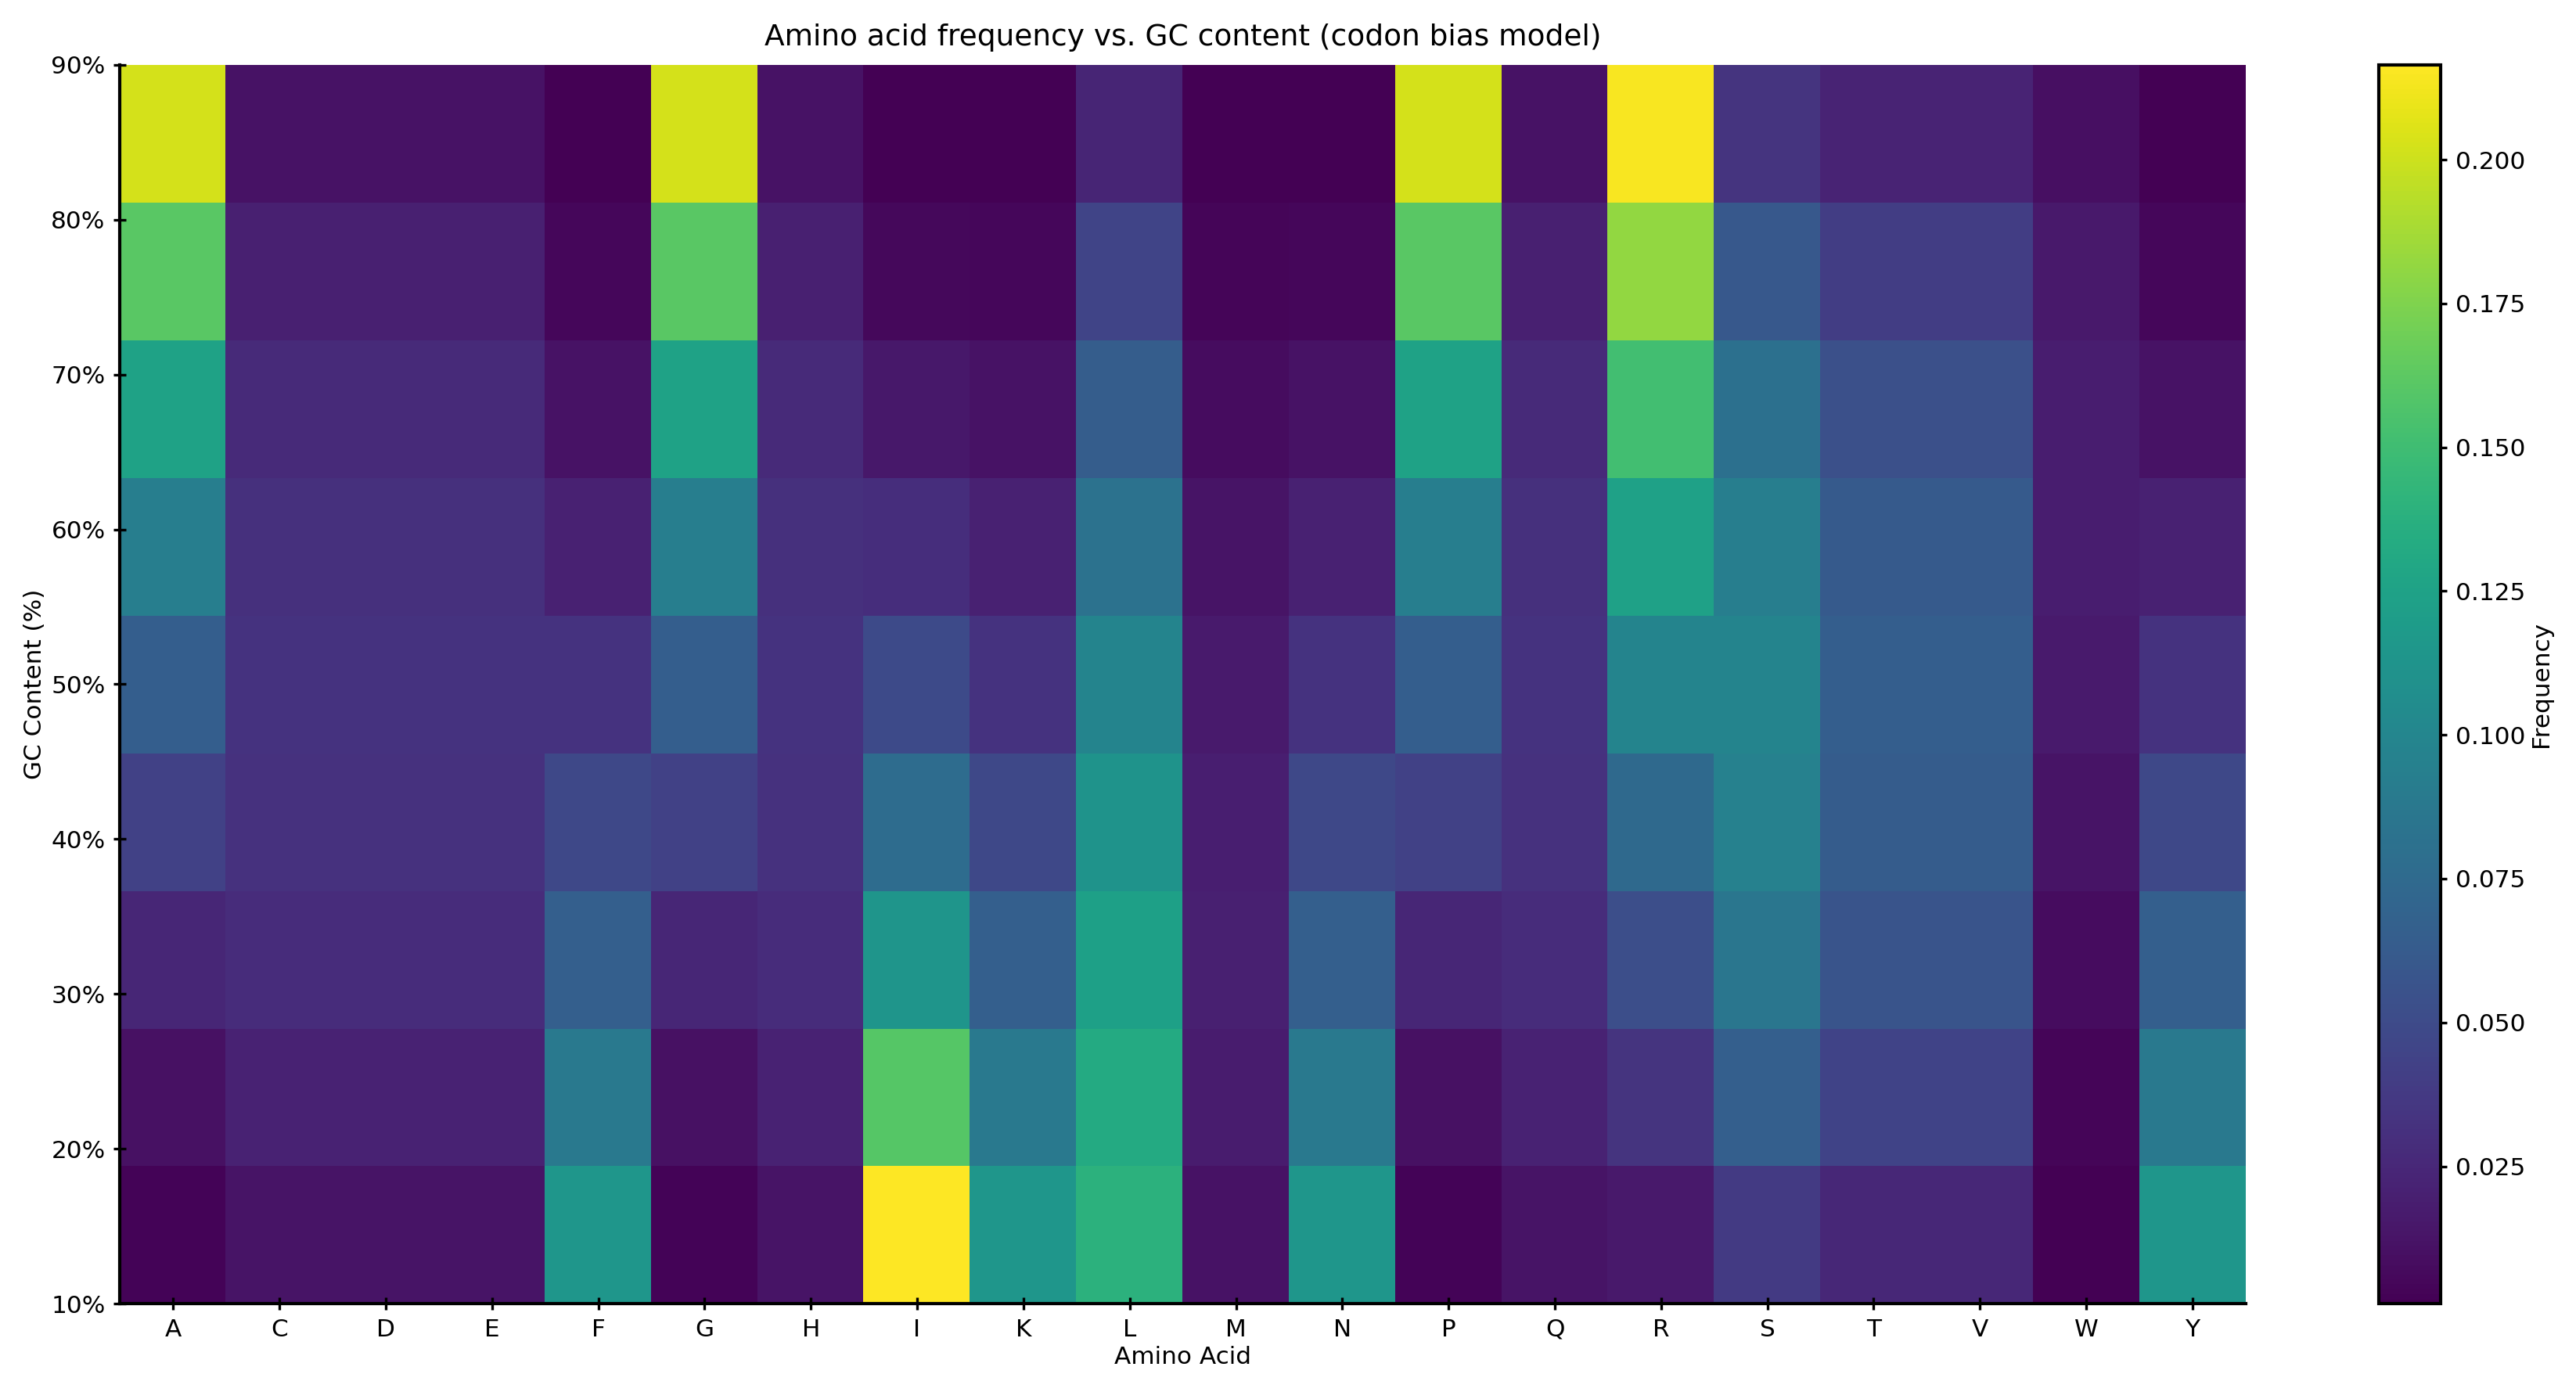

In [13]:
def amino_acid_frequencies(gc_content_frac):
    base_probs = {
        'A': (1-gc_content_frac)/2,
        'T': (1-gc_content_frac)/2,
        'G': gc_content_frac/2,
        'C': gc_content_frac/2,
    }
    aa_probs = Counter()
    for codon in itertools.product("ACGT", repeat=3):
        codon = "".join(codon)
        prob = base_probs[codon[0]] * base_probs[codon[1]] * base_probs[codon[2]]
        try:
            aa = standard_table.forward_table[codon]
            aa_probs[aa] += prob
        except: # skip stop codons
            continue

    
    total = sum(aa_probs.values())
    for aa in aa_probs:
        aa_probs[aa] /= total
    return dict(aa_probs)

# Simulate across a range of GC contents
gc_values = [i/100 for i in range(10, 91, 10)]  # 10% to 90%
aa_freqs = {gc: amino_acid_frequencies(gc) for gc in gc_values}

all_aas = sorted({aa for freqs in aa_freqs.values() for aa in freqs})

freq_matrix = np.array([[aa_freqs[gc].get(aa, 0) for aa in all_aas] for gc in gc_values])

plt.figure(figsize=(12, 6))
im = plt.imshow(freq_matrix, aspect="auto", cmap="viridis", origin="lower",
                extent=[0, len(all_aas), min(gc_values)*100, max(gc_values)*100])

plt.colorbar(im, label="Frequency")
plt.xticks(ticks=np.arange(len(all_aas))+0.5, labels=all_aas, rotation=0)
plt.yticks(np.linspace(min(gc_values)*100, max(gc_values)*100, len(gc_values)), 
           [f"{int(gc*100)}%" for gc in gc_values])
plt.xlabel("Amino Acid")
plt.ylabel("GC Content (%)")
plt.title("Amino acid frequency vs. GC content (codon bias model)")
plt.tight_layout()
plt.show()


In [14]:
unit = .002
half_unit = .001
manual_offset_malaria = {
    'A': (-unit,half_unit),
    'C': (half_unit,-unit),
    'D': (unit,-unit),
    'E': (-unit,half_unit),
    'F': (-unit,half_unit),
    'G': (half_unit,unit),
    'H': (-unit,unit),
    'I': (-unit,unit),
    'K': (-unit,unit),
    'L':(-unit,unit),
    'M': (half_unit,unit),
    'N':(-unit,unit),
    'P': (unit,half_unit),
    'Q': (half_unit,unit),
    'R':(half_unit,-unit),
    'S':(half_unit,-unit),
    'T':(unit,half_unit),
    'V':(-unit,-unit),
    'W':(half_unit,unit),
    'Y':(-unit,unit),

    
}

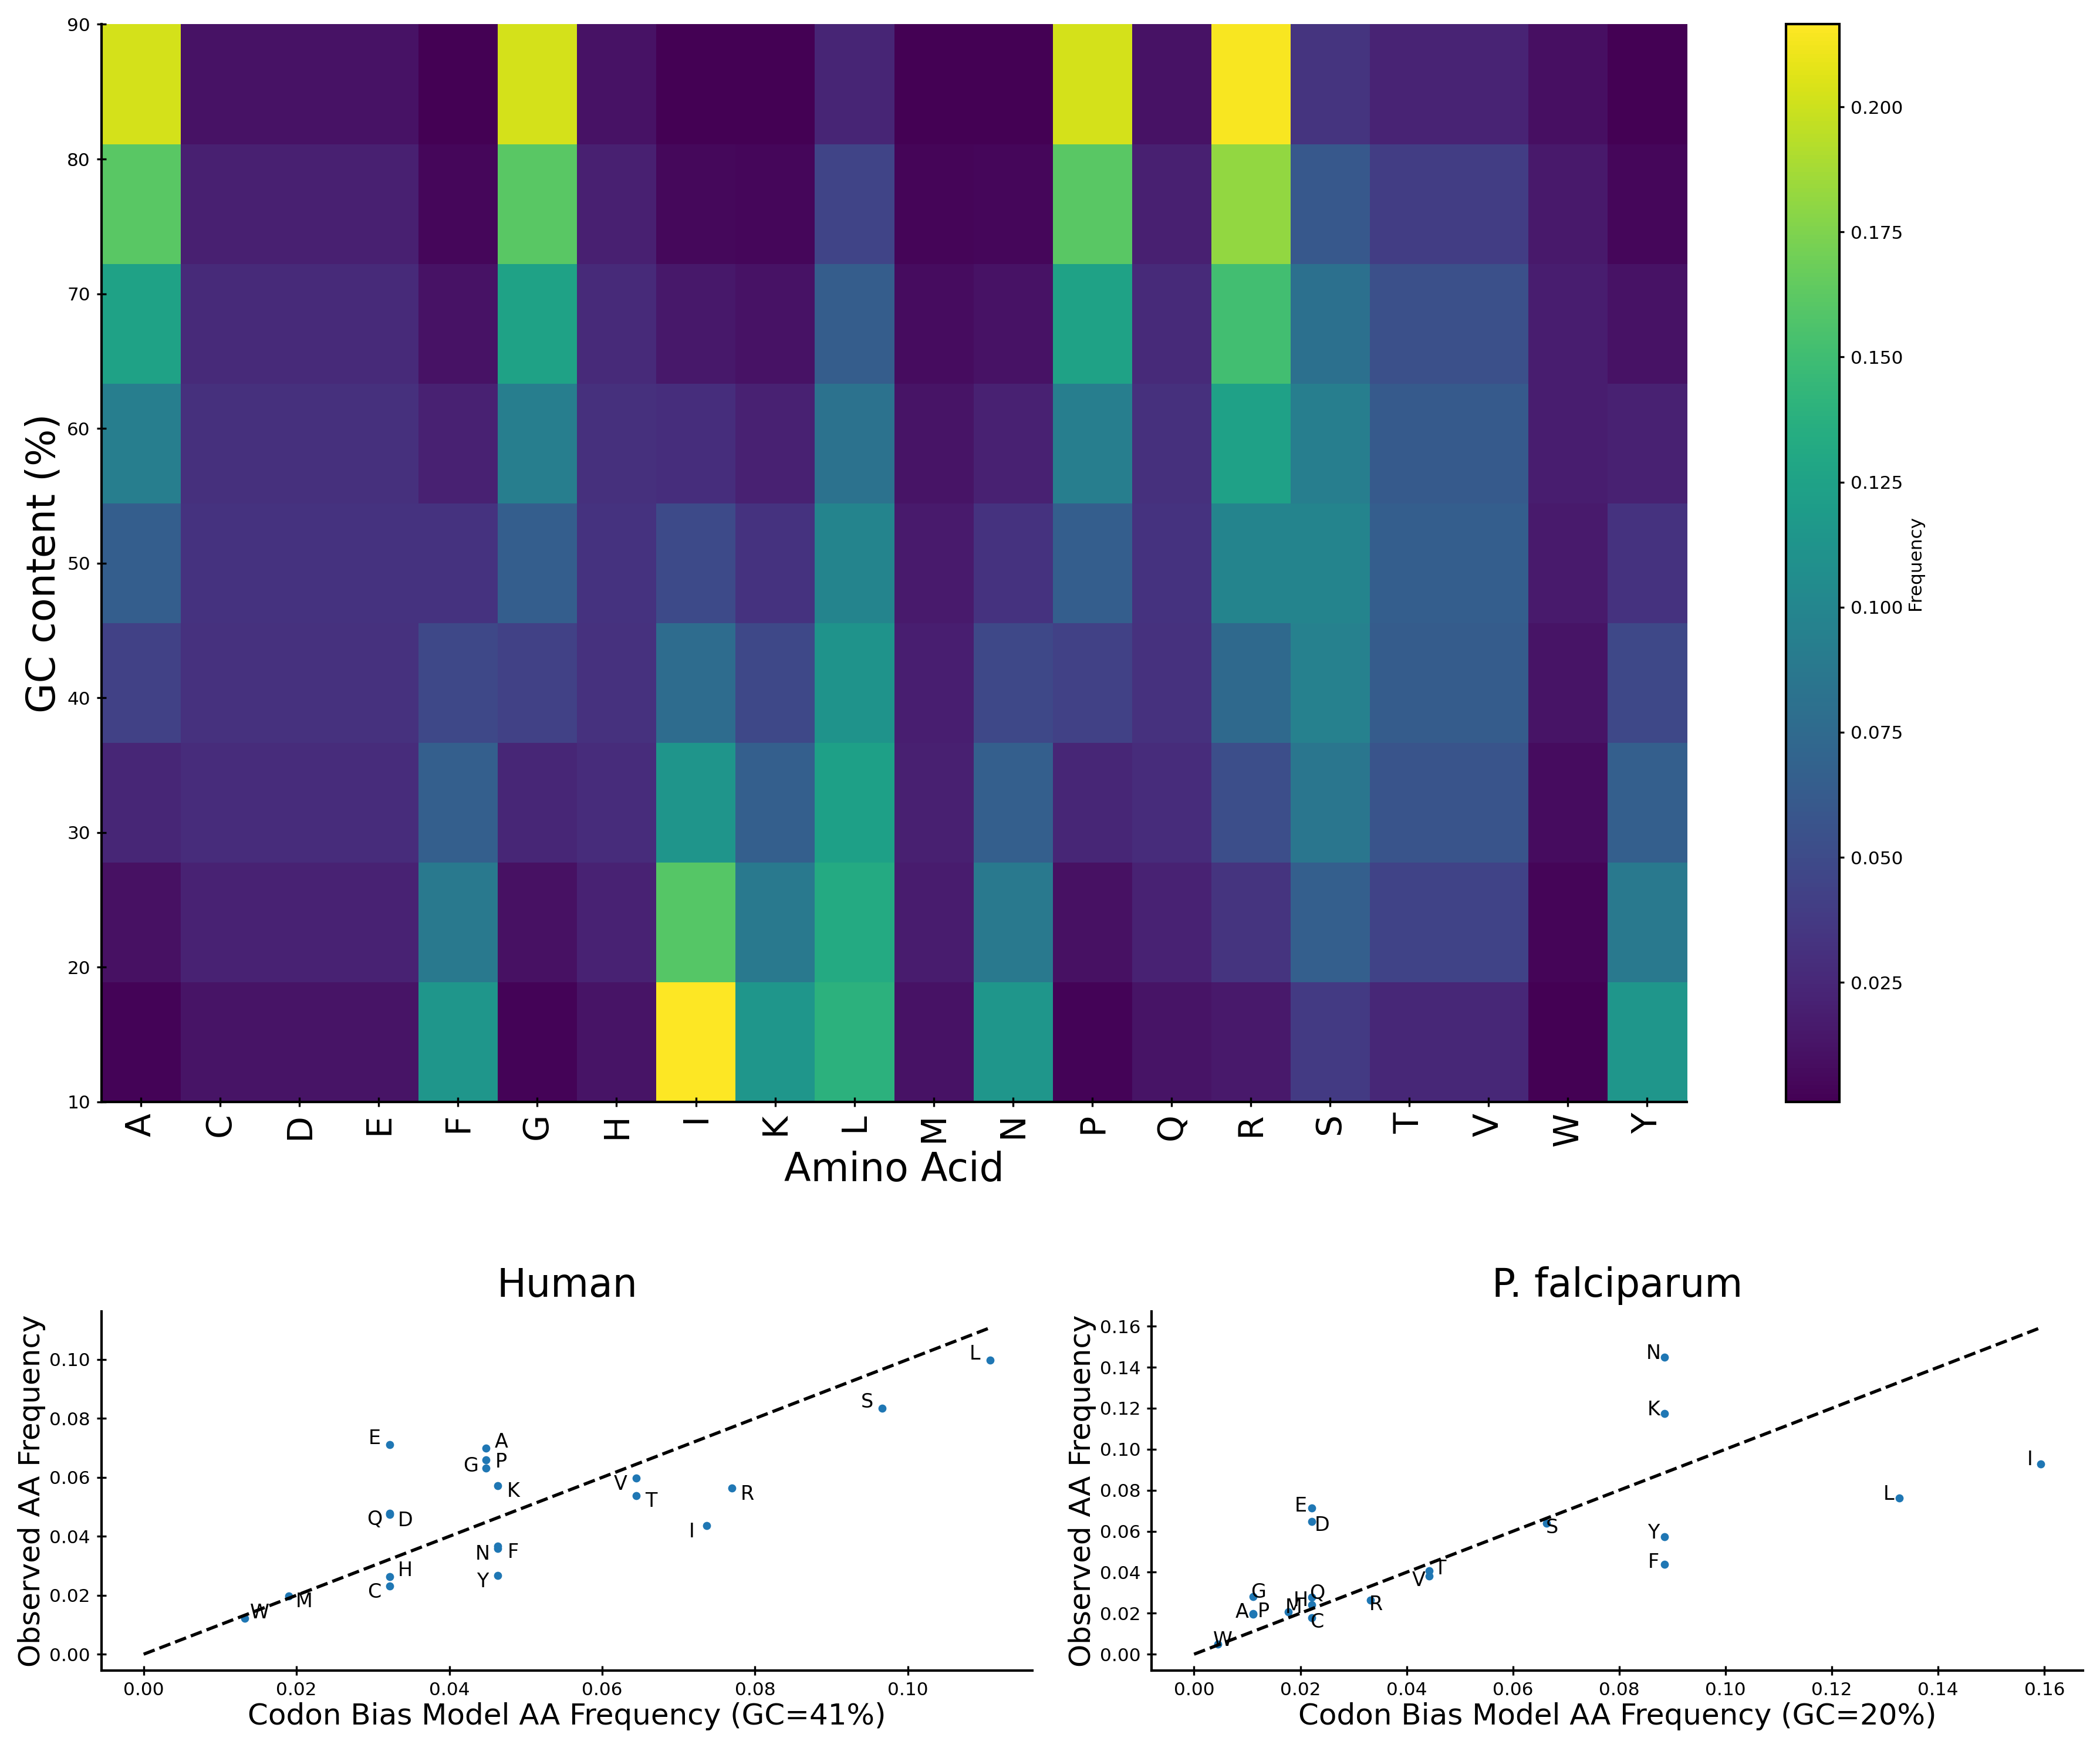

In [15]:
human_null = amino_acid_frequencies(0.41)
malaria_null = amino_acid_frequencies(0.20)

fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, height_ratios=[3, 1], figure=fig)

ax_heatmap = fig.add_subplot(gs[0, :])


im = ax_heatmap.imshow(freq_matrix, aspect="auto", cmap="viridis", origin="lower",
                      extent=[0, len(all_aas), min(gc_values)*100, max(gc_values)*100])
ax_heatmap.set_xticks(np.arange(len(all_aas))+0.5)
ax_heatmap.set_xticklabels(all_aas, rotation=90,fontsize=14)
ax_heatmap.set_ylabel("GC content (%)",fontsize=16)
ax_heatmap.set_xlabel("Amino Acid",fontsize=16)
fig.colorbar(im, ax=ax_heatmap, orientation="vertical", label="Frequency")

ax_human = fig.add_subplot(gs[1, 0])
x = [human_null[aa] for aa in all_aas]
y = freqs['UP000005640Human.fasta.gz']
for i, aa in enumerate(all_aas):
    dx = 0.002 if i % 2 == 0 else -0.002
    dy = 0.002 if i % 3 == 0 else -0.002
    ax_human.text(x[i] + dx, y[i] + dy, aa, fontsize=8, ha="center", va="center")
ax_human.scatter(x, y)
ax_human.plot([0, max(x+y)], [0, max(x+y)], 'k--')  # y=x line
ax_human.set_xlabel("Codon Bias Model AA Frequency (GC=41%)",fontsize=12)
ax_human.set_ylabel("Observed AA Frequency",fontsize=12)
ax_human.set_title("Human",fontsize=16)

ax_malaria = fig.add_subplot(gs[1, 1])
x = [malaria_null[aa] for aa in all_aas]
y = freqs['UP000001450Malaria.fasta.gz']
ax_malaria.scatter(x, y)
ax_malaria.plot([0, max(x+y)], [0, max(x+y)], 'k--')
for i, aa in enumerate(all_aas):
    dx, dy = manual_offset_malaria[aa]
    ax_malaria.text(x[i]+dx, y[i]+dy, aa, fontsize=8, ha="center", va="center")
ax_malaria.set_xlabel("Codon Bias Model AA Frequency (GC=20%)",fontsize=12)
ax_malaria.set_ylabel("Observed AA Frequency",fontsize=12)
ax_malaria.set_title("P. falciparum",fontsize=16)


fig.tight_layout(h_pad=3.5)
fig.savefig('bias_model.png')

In [19]:
from sklearn.metrics import r2_score

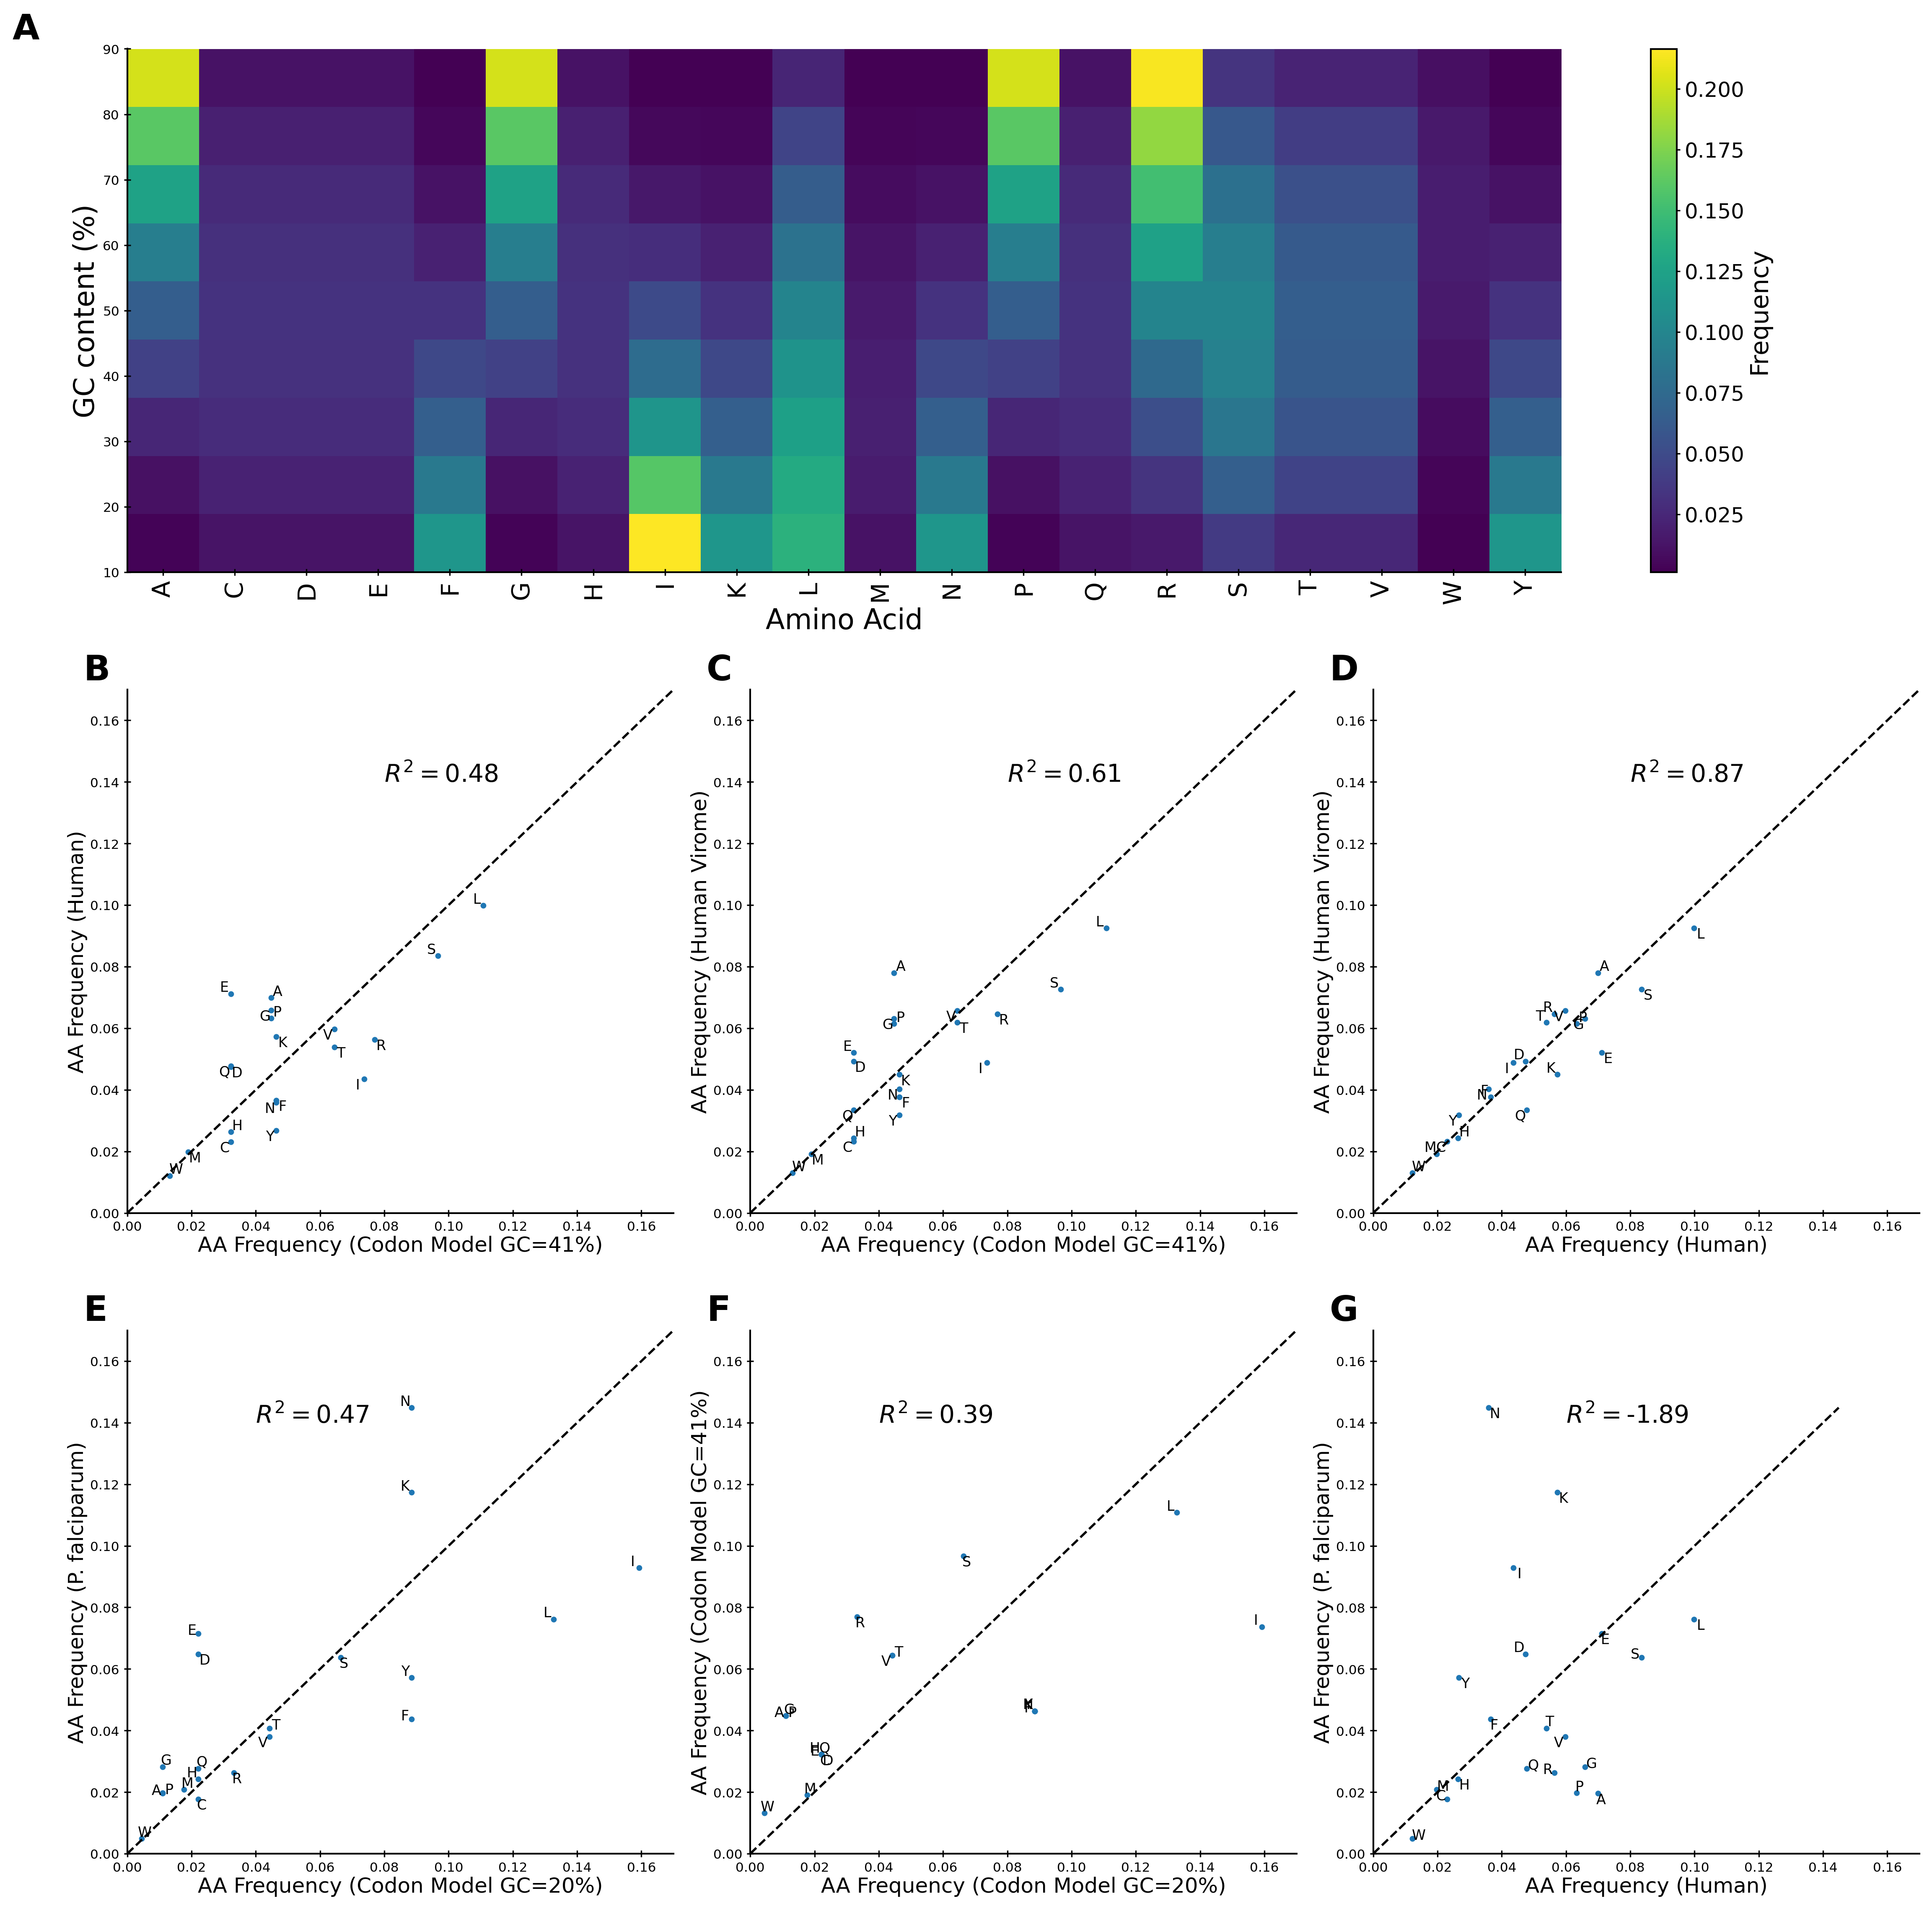

In [28]:
human_null = amino_acid_frequencies(0.41)
malaria_null = amino_acid_frequencies(0.20)

fig = plt.figure(figsize=(15, 15))
gs = GridSpec(3, 3, height_ratios=[1, 1,1], figure=fig)

ax_heatmap = fig.add_subplot(gs[0, :])


im = ax_heatmap.imshow(freq_matrix, aspect="auto", cmap="viridis", origin="lower",
                      extent=[0, len(all_aas), min(gc_values)*100, max(gc_values)*100])
ax_heatmap.set_xticks(np.arange(len(all_aas))+0.5)
ax_heatmap.set_xticklabels(all_aas, rotation=90,fontsize=14)
ax_heatmap.set_ylabel("GC content (%)",fontsize=16)
ax_heatmap.set_xlabel("Amino Acid",fontsize=16)
cbar = fig.colorbar(im, ax=ax_heatmap, orientation="vertical", label="Frequency")
cbar.set_label("Frequency", fontsize=14)
cbar.ax.tick_params(labelsize=12)  


ax_human = fig.add_subplot(gs[1, 0])
x = [human_null[aa] for aa in all_aas]
y = freqs['UP000005640Human.fasta.gz']
r2 = r2_score(x,y)
ax_human.text(.08,.14,"$R^2=$" + f"{r2:.2f}",fontsize=14)
for i, aa in enumerate(all_aas):
    dx = 0.002 if i % 2 == 0 else -0.002
    dy = 0.002 if i % 3 == 0 else -0.002
    ax_human.text(x[i] + dx, y[i] + dy, aa, fontsize=8, ha="center", va="center")
ax_human.scatter(x, y)
ax_human.plot([0, 0.17], [0, 0.17], 'k--')  # y=x line
ax_human.set_xlabel("AA Frequency (Codon Model GC=41%)",fontsize=12)
ax_human.set_ylabel("AA Frequency (Human)",fontsize=12)

ax_virus = fig.add_subplot(gs[1, 1])
x = [human_null[aa] for aa in all_aas]
y = freqs['human-viruses-uniref90-filtered.fasta']
r2 = r2_score(x,y)
ax_virus.text(.08,.14,"$R^2=$" + f"{r2:.2f}",fontsize=14)
for i, aa in enumerate(all_aas):
    dx = 0.002 if i % 2 == 0 else -0.002
    dy = 0.002 if i % 3 == 0 else -0.002
    ax_virus.text(x[i] + dx, y[i] + dy, aa, fontsize=8, ha="center", va="center")
ax_virus.scatter(x, y)
ax_virus.plot([0, 0.17], [0, 0.17], 'k--')  # y=x line
ax_virus.set_xlabel("AA Frequency (Codon Model GC=41%)",fontsize=12)
ax_virus.set_ylabel("AA Frequency (Human Virome)",fontsize=12)

ax_human_virus = fig.add_subplot(gs[1, 2])
y = freqs['human-viruses-uniref90-filtered.fasta']
x = freqs['UP000005640Human.fasta.gz']
r2 = r2_score(x,y)
ax_human_virus.text(.08,.14,"$R^2=$" + f"{r2:.2f}",fontsize=14)
for i, aa in enumerate(all_aas):
    dy = 0.002 if i % 2 == 0 else -0.002
    dx = 0.002 if i % 3 == 0 else -0.002
    ax_human_virus.text(x[i] + dx, y[i] + dy, aa, fontsize=8, ha="center", va="center")
ax_human_virus.scatter(x, y)
ax_human_virus.plot([0, 0.17], [0, 0.17], 'k--')  # y=x line
ax_human_virus.set_ylabel("AA Frequency (Human Virome)",fontsize=12)
ax_human_virus.set_xlabel("AA Frequency (Human)",fontsize=12)


ax_malaria = fig.add_subplot(gs[2, 0])
x = [malaria_null[aa] for aa in all_aas]
y = freqs['UP000001450Malaria.fasta.gz']
ax_malaria.scatter(x, y)
ax_malaria.plot([0, 0.17], [0, 0.17], 'k--')
r2 = r2_score(x,y)
ax_malaria.text(.04,.14,"$R^2=$" + f"{r2:.2f}",fontsize=14)
for i, aa in enumerate(all_aas):
    dx, dy = manual_offset_malaria[aa]
    ax_malaria.text(x[i]+dx, y[i]+dy, aa, fontsize=8, ha="center", va="center")
ax_malaria.set_xlabel("AA Frequency (Codon Model GC=20%)",fontsize=12)
ax_malaria.set_ylabel("AA Frequency (P. falciparum)",fontsize=12)

ax_models = fig.add_subplot(gs[2, 1])
y = [human_null[aa] for aa in all_aas]
x = [malaria_null[aa] for aa in all_aas]
ax_models.scatter(x, y)
ax_models.plot([0, 0.17], [0, 0.17], 'k--')
r2 = r2_score(x,y)
ax_models.text(.04,.14,"$R^2=$" + f"{r2:.2f}",fontsize=14)
for i, aa in enumerate(all_aas):
    dx, dy = manual_offset_malaria[aa]
    ax_models.text(x[i]+dx, y[i]+dy, aa, fontsize=8, ha="center", va="center")
ax_models.set_xlabel("AA Frequency (Codon Model GC=20%)",fontsize=12)
ax_models.set_ylabel("AA Frequency (Codon Model GC=41%)",fontsize=12)


ax_malaria_human = fig.add_subplot(gs[2, 2])
x = freqs['UP000005640Human.fasta.gz']
y = freqs['UP000001450Malaria.fasta.gz']
ax_malaria_human.scatter(x, y)
ax_malaria_human.plot([0, max(x+y)], [0, max(x+y)], 'k--')
r2 = r2_score(x,y)
ax_malaria_human.text(.06,.14,"$R^2=$" + f"{r2:.2f}",fontsize=14)
for i, aa in enumerate(all_aas):
    dy, dx = manual_offset_malaria[aa]
    ax_malaria_human.text(x[i]+dx, y[i]+dy, aa, fontsize=8, ha="center", va="center")
ax_malaria_human.set_xlabel("AA Frequency (Human)",fontsize=12)
ax_malaria_human.set_ylabel("AA Frequency (P. falciparum)",fontsize=12)

for ax in [ax_human,ax_human_virus,ax_virus, ax_malaria,ax_malaria_human,ax_models]:
    ax.set_xlim([0,0.17])
    ax.set_ylim([0,0.17])

fig.tight_layout(h_pad=3.5)

label_axes([
    ax_heatmap, ax_human,ax_virus,ax_human_virus,
    ax_malaria,ax_models,ax_malaria_human], labelstyle='%s',
           xy=(-0.08, 1.07),fontsize=20)

fig.savefig('bias_model.png')